In [1]:
import pandas_datareader as pdr
import pandas as pd

In [2]:
start = '1928-01-01'

In [3]:
ff = pdr.get_data_famafrench('F-F_Research_Data_Factors', freq='M', start=start)

In [4]:
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1928-01   -0.68  4.26 -0.75  0.25
 1928-02   -1.70 -2.06 -0.65  0.33
 1928-03    8.81 -0.26 -1.22  0.29
 1928-04    4.23  3.98  3.44  0.22
 1928-05    1.52  2.85 -3.27  0.32
 ...         ...   ...   ...   ...
 2022-05   -0.34 -1.85  8.41  0.03
 2022-06   -8.43  2.09 -5.97  0.06
 2022-07    9.57  2.81 -4.10  0.08
 2022-08   -3.78  1.39  0.31  0.19
 2022-09   -9.36 -0.81  0.05  0.19
 
 [1137 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 1932   -9.39   4.40  11.11  0.96
 ...      ...    ...    ...   ...
 2017   21.51  -4.97 -13.51  0.80
 2018   -6.95  -3.21  -9.73  1.83
 2019   28.28  -6.10 -10.34  2.15
 2020   23.66  13.17 -46.57  0.45
 2021   23.56  -3.92  25.57  0.04
 
 [94 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

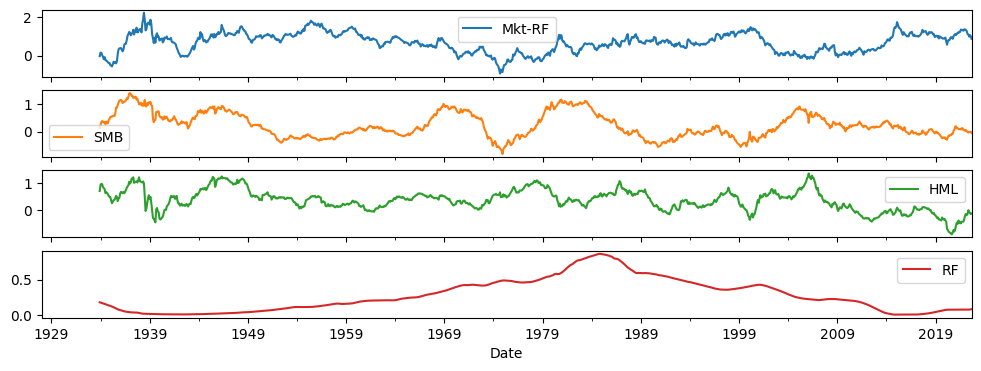

In [5]:
ff_df = ff[0]
ff_df.rolling(72).mean().plot(subplots=True, figsize=(12,4))

In [6]:
ff_mom_df = pdr.get_data_famafrench('F-F_Momentum_Factor', freq='M', start=start)[0]

array([<AxesSubplot: xlabel='Date'>], dtype=object)

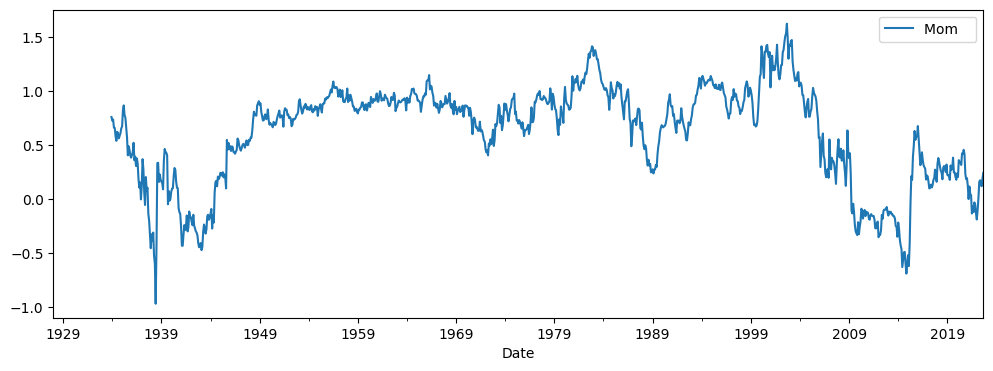

In [7]:
ff_mom_df.rolling(72).mean().plot(subplots=True, figsize=(12,4))

In [8]:
ff_df

,Mkt-RF,SMB,HML,RF
Date,,,,
1928-01,-0.68,4.26,-0.75,0.25
1928-02,-1.70,-2.06,-0.65,0.33
1928-03,8.81,-0.26,-1.22,0.29
1928-04,4.23,3.98,3.44,0.22
1928-05,1.52,2.85,-3.27,0.32
...,...,...,...,...
2022-05,-0.34,-1.85,8.41,0.03
2022-06,-8.43,2.09,-5.97,0.06
2022-07,9.57,2.81,-4.10,0.08


In [9]:
ff_mom_df

,Mom
Date,
1928-01,-0.52
1928-02,-1.09
1928-03,4.70
1928-04,-4.41
1928-05,3.02
...,...
2022-05,2.48
2022-06,0.79
2022-07,-3.96


In [10]:
ffac_merged_df = pd.merge(ff_df, ff_mom_df, on='Date', how='inner', sort=True, copy=True, indicator=False, validate='one_to_one')

In [11]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1928-01,-0.68,4.26,-0.75,0.25,-0.52
1928-02,-1.70,-2.06,-0.65,0.33,-1.09
1928-03,8.81,-0.26,-1.22,0.29,4.70
1928-04,4.23,3.98,3.44,0.22,-4.41
1928-05,1.52,2.85,-3.27,0.32,3.02
...,...,...,...,...,...
2022-05,-0.34,-1.85,8.41,0.03,2.48
2022-06,-8.43,2.09,-5.97,0.06,0.79
2022-07,9.57,2.81,-4.10,0.08,-3.96


In [13]:
import yfinance as yf

In [14]:
yf.pdr_override()

In [20]:
AAPL_data = pdr.data.get_data_yahoo('AAPL', start=start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%***********************]  1 of 1 completed


In [21]:
AAPL_df = AAPL_data.to_frame()
AAPL_df

,Adj Close
Date,
1980-12-31,NaN
1981-01-31,-0.172163
1981-02-28,-0.061944
1981-03-31,-0.075475
1981-04-30,0.158163
...,...
2022-07-31,0.188634
2022-08-31,-0.031208
2022-09-30,-0.120977


In [22]:
AAPL_df['str_date'] = AAPL_data.index.astype(str)
AAPL_df['dt_date'] = pd.to_datetime(AAPL_df['str_date']).dt.strftime('%Y-%m')

In [25]:
ffac_merged_df['str_date'] = ffac_merged_df.index.astype(str)
ffac_merged_df['dt_date'] = pd.to_datetime(ffac_merged_df['str_date']).dt.strftime('%Y-%m')

In [26]:
AAPL_ffac_merged_df = pd.merge(AAPL_df, ffac_merged_df, on='dt_date', how='inner', sort=True, copy=True, indicator=False, validate='one_to_one')

In [ ]:
AAPL_ffac_merged_df.drop(columns=['str_date_x', 'str_date_y'], inplace=True)
AAPL_ffac_merged_df.rename(columns={'Adj Close': 'AAPL'}, inplace=True)

In [45]:
AAPL_ffac_merged_df.rename(columns={'Mom   ': 'Mom'}, inplace=True)

In [37]:
AAPL_ffac_merged_df['AAPL_RF'] = AAPL_ffac_merged_df['AAPL']*100-AAPL_ffac_merged_df['RF']

In [39]:
AAPL_ffac_merged_df.dropna(axis=0, inplace=True)

In [46]:
AAPL_ffac_merged_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
1,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256255
2,-0.061944,1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264377
3,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,-8.757486
4,0.158163,1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736260
5,0.167398,1981-05,0.11,2.00,-0.42,1.15,3.70,15.589802
...,...,...,...,...,...,...,...,...
497,-0.054496,2022-05,-0.34,-1.85,8.41,0.03,2.48,-5.479608
498,-0.081430,2022-06,-8.43,2.09,-5.97,0.06,0.79,-8.202977
499,0.188634,2022-07,9.57,2.81,-4.10,0.08,-3.96,18.783371
500,-0.031208,2022-08,-3.78,1.39,0.31,0.19,2.10,-3.310799


In [49]:
from statsmodels.api import OLS
import statsmodels.tools

In [50]:
AAPL_ffac_merged_df_c = statsmodels.tools.add_constant(AAPL_ffac_merged_df, prepend=True)

In [53]:
results = OLS(AAPL_ffac_merged_df_c['AAPL_RF'], AAPL_ffac_merged_df_c[['const', 'Mkt-RF', 'SMB', 'HML', 'Mom']], missing='drop').fit()

In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AAPL_RF   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     49.56
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           4.35e-35
Time:                        14:09:10   Log-Likelihood:                -1908.7
No. Observations:                 501   AIC:                             3827.
Df Residuals:                     496   BIC:                             3848.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4735      0.508      2.902      0.004       0.476       2.471
Mkt-RF         1.1996      0.118     10.197      0.000       0.968       1.431
SMB            0.2154      0.172      1.251      0.212      -0.123       0.554
HML           -0.9217      0.171     -5.403      0.000      -1.257      -0.586
Mom           -0.1199      0.119     -1.006      0.315      -0.354       0.114
==============================================================================
Omnibus:                       13.886   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               27.626
Skew:                          -0.056   Prob(JB):                     1.00e-06
Kurtosis:                       4.145   Cond. No.                         5.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
results.predict([-8.43,2.09,-5.97,0.06,0.79])

array([-11.3499135])

In [57]:
results.predict([9.57, 2.81, -4.10, 0.08, -3.96])

array([16.98996939])

In [58]:
results.predict([-3.78, 1.39, 0.31, 0.19, 2.10])

array([-4.26236345])